# Implementar las siguientes funciones de transformaciones 2D
1. Escalar
2. Rotar
3. Transladar

• Las funciones reciben la información de
una malla en coordenadas homogéneas en
donde cada vértice es una fila de una
matriz

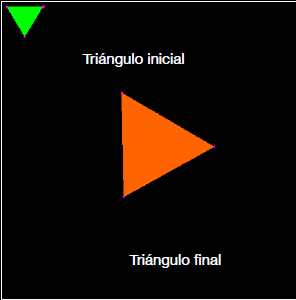

In [5]:
#Se importan las librerias necesarias
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [13]:
# Creación de las funciones

# Se crea una función para dibujar el triángulo
def draw_triangle(im, triangle, color=(0,255,0)):
    triangle = np.array([ v[:-1]/v[-1] for v in triangle] , np.uint16)
    cv2.drawContours(im, [triangle.astype(int)], 0, color, -1)
    for v in triangle:
        cv2.circle(im, tuple(v), 2, (255,0,255),-1)

# Se crea función para escalar el triángulo
def scale(vertex, sx, sy):
    M = np.array([[sx,0,0], [0,sy,0], [0,0,1]])
    res =  M @ vertex.T
    return res.T

# Se crea función para rotar el triángulo
def rotate(vertex, a):
    M = np.array([[np.cos(a),-np.sin(a),0], [np.sin(a),np.cos(a),0], [0,0,1]])
    res =  M @ vertex.T
    return res.T

# Se crea función para transladar el triángulo
def translate(vertex, dx, dy):
    M = np.array([[1,0,dx], [0,1,dy], [0,0,1]])
    res =  M @ vertex.T
    return res.T

# Se crea función compuesta con las tres transformaciones
def compuesta(vertex, dx, dy, sx, sy, a):
   M = np.array([[sx*np.cos(a),-np.sin(a),dx], [np.sin(a),sy*np.cos(a),dy], [0,0,1]])
   res =  M @ vertex.T
   return res.T

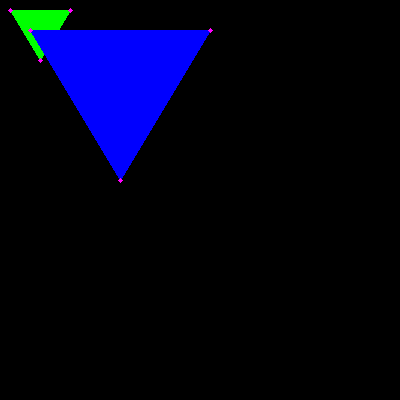

In [19]:
# Prueba de función scale

# Tamaño de la imagen
w = 400
h = 400
im = np.zeros((h,w,3), np.uint8)

# Parametros de la transformación
s = 3

# Visualización del triangulo original (verde) y su transformación escalar (azul)
triangle1 = np.array( [[10,10,1], [70,10,1], [40, 60,1]])
triangle2 = scale(triangle1, s, s)
draw_triangle(im, triangle1)
draw_triangle(im, triangle2, color= (255, 0, 0))

cv2_imshow(im)

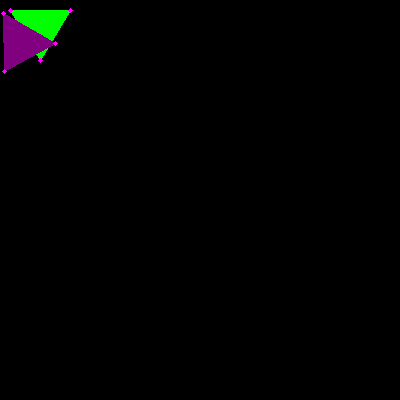

In [20]:
# Prueba de función rotate

# Tamaño de la imagen
w = 400
h = 400
im = np.zeros((h,w,3), np.uint8)

# Parametros de la transformación
angle = np.pi/6 #(30°)

# Visualización del triangulo original (verde) y su rotación (morado)
triangle1 = np.array( [[10,10,1], [70,10,1], [40, 60,1]])
triangle2 = rotate(triangle1, angle)
draw_triangle(im, triangle1)
draw_triangle(im, triangle2, color= (128,0,128))

cv2_imshow(im)

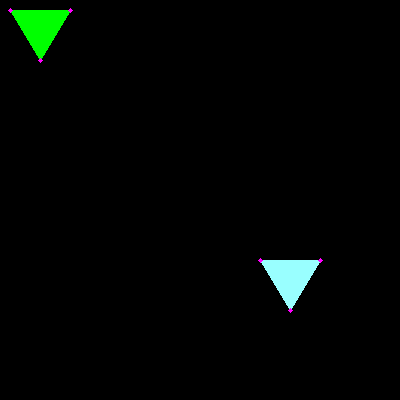

In [23]:
# Prueba de función translate

# Tamaño de la imagen
w = 400
h = 400
im = np.zeros((h,w,3), np.uint8)

# Parametros de la transformación
t = 250

# Visualización del triangulo original (verde) y su translación (cian)
triangle1 = np.array( [[10,10,1], [70,10,1], [40, 60,1]])
triangle2 = translate(triangle1, t, t)
draw_triangle(im, triangle1)
draw_triangle(im, triangle2, color= (255, 255, 153))

cv2_imshow(im)

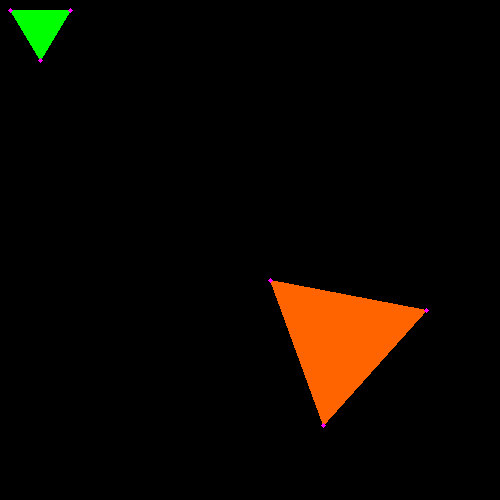

In [24]:
# Prueba de función compuesta

# Tamaño de la imagen
w = 500
h = 500
im = np.zeros((h,w,3), np.uint8)

# Parametros de la transformación
angle = np.pi/6 #(30°)
s = 3
t = 250

# Visualización del triangulo original (verde) y su transformación (naranja)
triangle1 = np.array( [[10,10,1], [70,10,1], [40, 60,1]])
triangle2 = compuesta(triangle1, t,t,s,s,angle)
draw_triangle(im, triangle1)
draw_triangle(im, triangle2, color= (0,100,255))

cv2_imshow(im)